<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [4]:
#from js import fetch
#import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
#data = pd.read_csv(text1)
data=pd.read_csv(URL1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [7]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(URL2)

In [8]:
X.head(10)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [9]:
print(X.describe)
print(type(X))

<bound method NDFrame.describe of     FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  

In [10]:
#check data type in the frame
print(X.dtypes)

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object


In [11]:
missing_data = X.isnull()
#print(missing_data)[3]
# function to check any missing data 
for column in missing_data.columns.values.tolist():
    if missing_data[column].value_counts().iloc[0] != X.shape[0]:
        print (missing_data[column].value_counts())


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [12]:
Y=data['Class']
print(Y.head())
type(Y) # here is the output...T
Y= Y.to_numpy()
type(Y)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


numpy.ndarray

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [13]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
print(X.shape)
print(type(X)) # X becomes an array
print("X ids an array 90 rows 83 columns-here is the left bottom corner of X:",X[89,82])



(90, 83)
<class 'numpy.ndarray'>
X ids an array 90 rows 83 columns-here is the left bottom corner of X: 0.5173061316114637


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', Y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', Y_test.shape)

X_train.shape= (72, 83) Y_train.shape= (72,)
X_test.shape= (18, 83) Y_test.shape= (18,)


we can see we only have 18 test samples.


In [15]:
#Y_test.shape

In [16]:
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])
print("Y_test",Y_test)

number of test samples : 18
number of training samples: 72
Y_test [0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1]


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [18]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [19]:
logreg_cv = GridSearchCV ( estimator=lr,param_grid=parameters,cv=10)
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [20]:

print('best params =',logreg_cv.best_params_)
print('best train regression score-fit',logreg_cv.best_score_ )

best params = {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
best train regression score-fit 0.85


## TASK  5

Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
accuracy=logreg_cv.score(X_test,Y_test)
print('test data accuracy regression model :',accuracy)


test data accuracy regression model : 0.8333333333333334


Lets look at the confusion matrix:


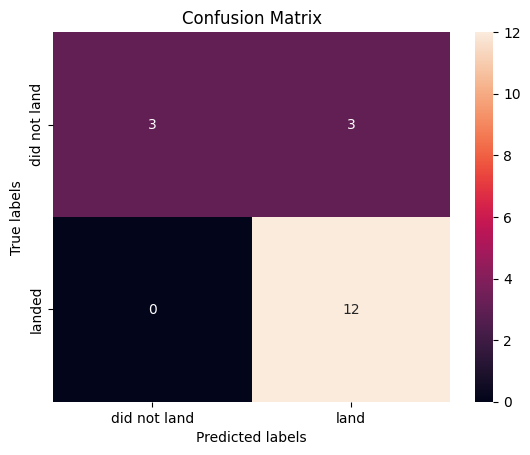

In [22]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


In [23]:
# in preparation of task - find best method
#create a dictionary  w keys - name of method used for data analysis values - accuracy, train accuracy, best params and yhat for plotting matrixes
methods={}
column_list=['regression','supportVectorMachine','decisiontree','nodeclustering']

# Put data in a dictionary to compare methods - start at index - first name in the columns list 
#columns=['regression','supportVectorMachine','decisiontree','nodeclustering']
i=0
methods[i]=column_list[i],accuracy,logreg_cv.best_score_,logreg_cv.best_params_,yhat

## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [25]:
svm_cv = GridSearchCV(estimator=svm,param_grid=parameters,cv=10)

svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [26]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy Train Support Vector Machine :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy Train Support Vector Machine : 0.8642857142857144


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [27]:
accuracy=svm_cv.score(X_test,Y_test)
print('test data Support Vector Machine accuracy :',accuracy)

test data Support Vector Machine accuracy : 0.8333333333333334


We can plot the confusion matrix


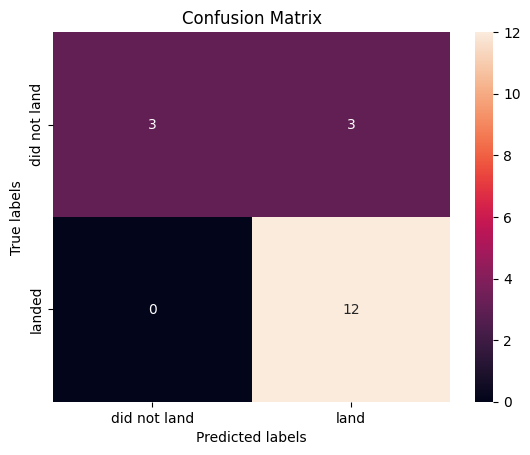

In [28]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [29]:
# Put data in a dictionary to compare methods 
#columns=['regression','supportVectorMachine','decisiontree','nodeclustering']
i+=1
methods[i]=column_list[i],accuracy,svm_cv.best_score_,svm_cv.best_params_,yhat

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [50]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]
     }

tree = DecisionTreeClassifier(random_state=0)
# should I use a randon

In [51]:

tree_cv = GridSearchCV(estimator=tree,param_grid=parameters,cv=10,)

tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [53]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy train decision tree :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy train decision tree : 0.8928571428571429


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [54]:
accuracy=tree_cv.score(X_test,Y_test)
print('test data Decision Tree accuracy :',accuracy)

test data Decision Tree accuracy : 0.8333333333333334


We can plot the confusion matrix


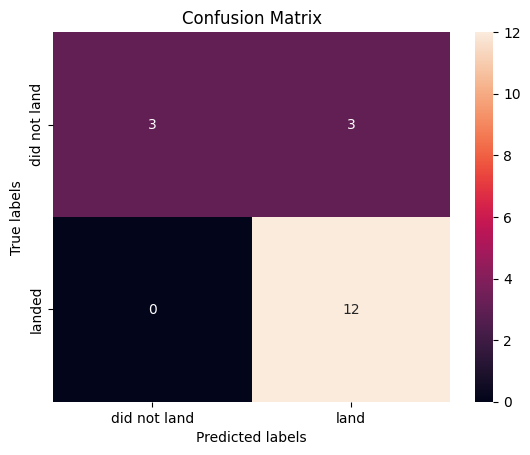

In [34]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [35]:
# Put data in a dictionary to compare methods 
#columns=['regression','supportVectorMachine','decisiontree','nodeclustering']
i+=1
# index = 2 now
#columns=['regression','supportVectorMachine','decisiontree','nodeclustering']
methods[i]=column_list[i],accuracy,tree_cv.best_score_,tree_cv.best_params_,yhat


## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [36]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [37]:
knn_cv = GridSearchCV(estimator=KNN,param_grid=parameters,cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [38]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("KNN model accuracy in train:",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
KNN model accuracy in train: 0.8642857142857142


## TASK  11


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [39]:
accuracy=knn_cv.score(X_test,Y_test)
print('test data KNN model accuracy :',accuracy)


test data KNN model accuracy : 0.7777777777777778


We can plot the confusion matrix


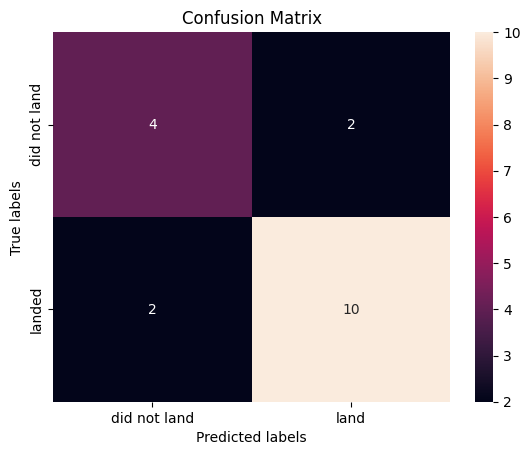

In [40]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [41]:
#columns=['regression','supportVectorMachine','decisiontree','nodeclustering']
# finally - index 3
i+=1
methods[i]=column_list[i],accuracy,knn_cv.best_score_,knn_cv.best_params_,yhat

## TASK  12


Find the method performs best:


In [42]:
frame_column=['Method Name','Model Test Accuracy', 'Train Accuracy','Best Params','plot data - yhat']
frame_column
pd_methods= pd.DataFrame.from_dict(methods,orient='index',columns=frame_column)
from pandas import option_context
with option_context('display.max_colwidth', None):
    print(pd_methods[['Method Name','Model Test Accuracy', 'Train Accuracy','Best Params']])

            Method Name  Model Test Accuracy  Train Accuracy  \
0            regression             0.833333        0.850000   
1  supportVectorMachine             0.833333        0.864286   
2          decisiontree             0.833333        0.892857   
3        nodeclustering             0.777778        0.864286   

                                                                                                                        Best Params  
0                                                                                    {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  
1                                                                     {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}  
2  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}  
3                                                                                   {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}  


In [43]:
'''   
someone forgot to define the random_state param - so results vary -
       Method Name  Model Test Accuracy  Train Accuracy  \
0            regression             0.833333        0.850000   
1  supportVectorMachine             0.833333        0.864286   
2          decisiontree             0.833333        0.919643   
3        nodeclustering             0.777778        0.864286   

                                                                                                                            Best Params  
0                                                                                        {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  
1                                                                         {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}  
2  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}  
3                                                                                       {'algorithm': 'auto', 'n_neighbors': 4, 'p': 


         Method Name  Model Test Accuracy  Train Accuracy  \
0            regression             0.833333        0.850000   
1  supportVectorMachine             0.833333        0.864286   
2          decisiontree             0.833333        0.917857   
3        nodeclustering             0.777778        0.864286   

                                                                                                                            Best Params  
0                                                                                        {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  
1                                                                         {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}  
2  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}  
3                                                                                       {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}

          Method Name  Model Test Accuracy  Train Accuracy  \
0            regression             0.833333        0.850000   
1  supportVectorMachine             0.833333        0.864286   
2          decisiontree             0.777778        0.919643   
3        nodeclustering             0.777778        0.864286   

                                                                                                                            Best Params  
0                                                                                        {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  
1                                                                         {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}  
2  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}  
3                                                                                       {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}



           Method Name  Model Test Accuracy  Train Accuracy  \
0            regression             0.833333        0.850000   
1  supportVectorMachine             0.833333        0.864286   
2          decisiontree             0.833333        0.892857   
3        nodeclustering             0.777778        0.864286   

                                                                                                                        Best Params  
0                                                                                    {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  
1                                                                     {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}  
2  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}  
3                                                                                   {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}  
'''

"   \nsomeone forgot to define the random_state param - so results vary -\n       Method Name  Model Test Accuracy  Train Accuracy  0            regression             0.833333        0.850000   \n1  supportVectorMachine             0.833333        0.864286   \n2          decisiontree             0.833333        0.919643   \n3        nodeclustering             0.777778        0.864286   \n\n                                                                                                                            Best Params  \n0                                                                                        {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  \n1                                                                         {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}  \n2  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}  \n3                                                 

METHOD COMPARISON ACCURACY, TRAIN ACCURACY
Confusion matrix for regression


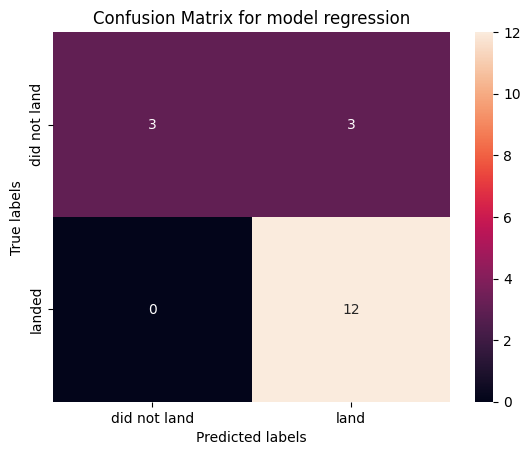

Confusion matrix for supportVectorMachine


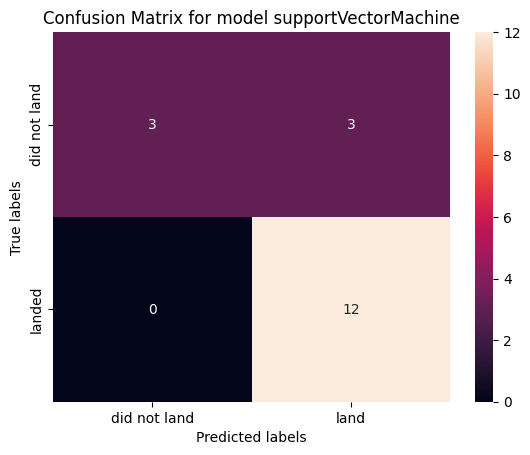

Confusion matrix for decisiontree


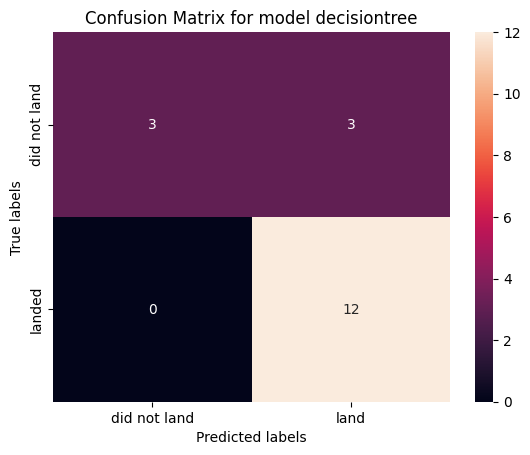

Confusion matrix for nodeclustering


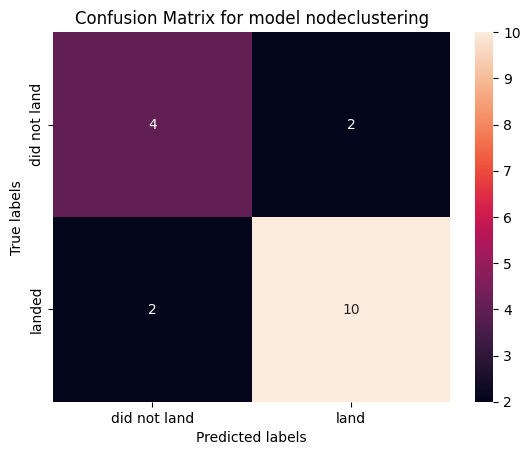

In [44]:
def plot_confusion_matrixNR(y,y_predict,methodname):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    #annot=True to annotate cells
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    #T=%i' %t
    ax.set_title('Confusion Matrix for model %s' %methodname)
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

print('METHOD COMPARISON ACCURACY, TRAIN ACCURACY')

for key in methods:
    print ('Confusion matrix for',methods[key][0])
    plot_confusion_matrixNR(Y_test,methods[key][4],methods[key][0])




## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)

## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
